# Looping

### Aufgestellung

Ein Körper der Masse $m = 20~g$ soll, nachdem dieser von einer Feder mit der Federkonstante $k = 4,8~\frac{N}{cm}$ abgeschossen wurde, eine Schleifenbahn vom Radius $r = 0,5~m$ reibungsfrei durchlaufen. Um welches Stück $x_0$ muss die Feder gespannt werden, damit der Körper die Schleifenbahn gerade noch durchläuft, ohne herunter zu fallen?


### Gegeben
- Masse des Körpers $m = 20~g$
- Federkonstante der Feder $k = 4,8~\frac{N}{cm}$
- Radius der Schleifenbahn $r = 0,5~m$

### Gesucht
- Federspannstrecke $x_0$

### Skizze
![title](Skizzen/Skizze_Looping.png)

### Physikalischer Lösungsweg
Mittels des Energieerhaltungssatzes für das System

$E_{pot,Feder}=E_{pot,Scheitelpunkt}+E_{kin,Scheitelpunkt}$

$\frac{k\cdot~x_0^2}{2} =2 \cdot~m \cdot~g \cdot~r + \frac{m\cdot~v_t^2}{2}$ 

und der Tangentialgeschwindigkeit $v_t^2=g\cdot~r$ aus dem Kraftansatz am Scheitelpunkt ($F_Z=F_G$)

$\frac{k\cdot~x_0^2}{2} =2 \cdot~m \cdot~g \cdot~r + \frac{m\cdot~g \cdot~r}{2}$ 

kann durch Umstellen die notwendige Federspannstrecke $x_0$ für das Durchlaufen des Loopings berechnet werden. Die Federspannstrecke gibt an, wie weit die Masse $m$ von ihrem Ruhepunkt gespannt wird. 

$x_0 = \sqrt(\frac{5 \cdot m \cdot g \cdot r}{k})$

Nun müssen die oben gegebenen Werte nur noch in die Formel eingesetzt werden. Desweiteren wird für diese Aufgabe die Fallbeschleunigung $g$ benötigt. 

$x_0 = \sqrt(\frac{5 \cdot~0,02\,kg \cdot~ 9,81\,\frac{m}{s^2} \cdot~ 0,5\,m}{480\,\frac{N}{m}}) = \sqrt(\frac{0,492\,N \cdot m}{480 \,\frac{N}{m}}) = \sqrt(0,001~m²) = 0,032~m = 3,2~cm$


### Implementierung in Python
Als Erstes müssen die verwendeten Bibliotheken importiert werden.

In [1]:
# Importieren der benötigten Bibliotheken
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

Anschließend können die gegebenen Werte in Variablen definiert werden. Somit kann $x_0$ direkt berechnet und in einer Variablen gespeichert werden. Auch kann ebenso eine Funktion erstellt werden, auf welche zu einem späteren Zeitpunkt zurückgegriffen werden kann.

In [2]:
# Variablen definieren
m = 0.02 # Masse m [kg]
k = 480 # Federkonstante k [N/m]
r = 0.5 # Radius r [m]
g = 9.81 # Fallbeschleunigung [m/s^2]

FG = m * g # Gewichtskraft

# Formel für x0
x0 = math.sqrt((5*FG*r)/(k))
# Ausgabe des gerundeten Ergebnisses
print(round(x0*100, 2), "cm") # round

def berechne_x0(FG, r, k):
    x0 = math.sqrt((5*FG*r)/(k))
    return x0

3.2 cm


Folgender Code-Block erzeugt dasselbe Ergebnis mittels einer while-Schleife. Solange $E_{pot} \leq E_{pot,kin}$ gilt spannt die Funktion die Feder virtuell weiter. 

In [3]:
E_pot_kin_looping = FG *2*r + ((m/2) * g * r) #Aus Energieerhaltungssatz
x0 = 0                       #Feder nicht gespannt
E_pot_Feder =  (k/2)*(x0**2) #zu Beginn '0', weil x0=0

while E_pot_Feder <= E_pot_kin_looping:

    x0 = x0 + 0.001  #Feder wird pro Iteration um 1 mm mehr gespannt, bis E_pot_Feder>E_pot_kin_looping
    E_pot_Feder =  (k/2)*(x0**2) #E_pot_Feder wird für neue Spannstrecke berechnet
     
# Ausgabe des gerundeten Ergebnisses
print(round(x0*100, 2),"cm")

3.2 cm


### Graphische Darstellung der physikalischen Lösung
Um den Looping durchlaufen zu können, muss die Zentrifugalkraft am Scheitelpunkt größer sein als die Gewichtskraft bzw. im Grenzfall gleich der Gewichtskraft ($F_Z=F_G$). Um die durch die Federspannung entstehende Zentrifugalkraft zu berechnen, wird der Energieerhaltungssatz mit eingesetzter Tangentialgeschwindigkeit nach $F_Z=m\cdot~a_r=m\cdot~g=F_G$ umgestellt:

$\frac{k\cdot~x_0^2}{2} =2 \cdot~m \cdot~g \cdot~r + \frac{m\cdot~g \cdot~r}{2}$ 

$\frac{k\cdot~x_0^2}{r} =4 \cdot~m \cdot~g + m\cdot~ g=5\cdot~m\cdot~g=5\cdot~F_Z$

$F_Z=\frac{k\cdot~x_0^2}{5\cdot~r}$

Beim Spannen der Feder kann für jeden Schritt die Zentrifugalkraft am Scheitelpunkt ausgerechnet und in einem Plot aufgetragen werden. Wird die (konstante) Gewichtskraft zusätzlich in das Diagramm eingetragen, so zeigt der Schnittpunkt den Weg, den die Feder mindestens für das Durchlaufen des Loopings gespannt werden muss.
Man kann also das Spannen der Feder simulieren und berechnen, ab welcher Federspannstrecke die Zentrifugalkraft am Scheitelpunkt größer oder gleich der Gewichtskraft des abgeschossenen Körpers wird.
Hierfür wird in einem ersten Schritt ein $x_0$-Vektor erstellt:

In [4]:
# Erstellen des x0-Vektors mit Werten im 1 mm Abstand
x0_vector = np.arange(0,0.051,0.001) 

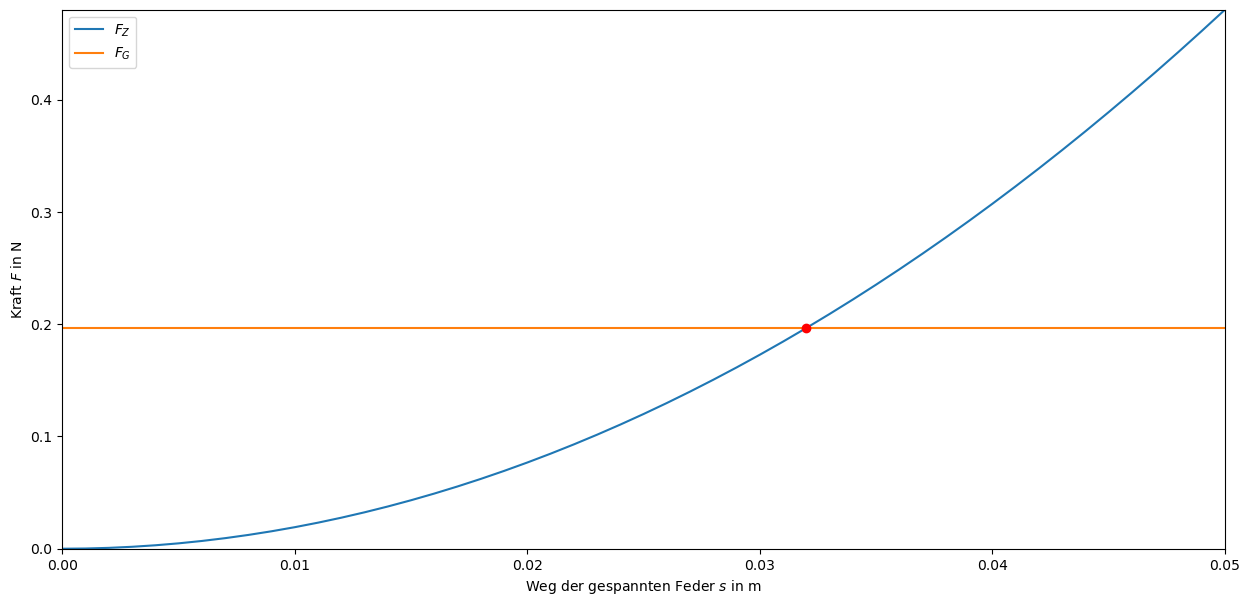

In [5]:
vector1 = []
vector2 = []

for s in x0_vector: #Berechnung der Kräfte für jeden x0 Wert
    vector1.append(k * s**2 / (5*r))
    vector2.append(FG)

# Erstellen von Vektoren
v1 = np.array(vector1)
v2 = np.array(vector2)
x  = np.array(x0_vector)

# Visualisierung
# Definieren der Größe und des Aussehens des Plots
fig, axs = plt.subplots(1, 1, figsize=(15, 7), sharey=False)
axs.plot(x, v1, label='$F_Z$')
axs.plot(x, v2, label='$F_G$')
# Achsenbeschriftungen hinzufügen
axs.set_xlabel(r"Weg der gespannten Feder $\mathit{s}$ in m")
axs.set_ylabel(r"Kraft $\mathit{F}$ in N")
# Achsenlegende
axs.legend()
# Schnittpunkt visualisieren 
idx = np.argwhere(np.diff(np.sign(v2 - v1))).flatten()
axs.plot(x[idx+1], v2[idx+1], 'ro')
plt.margins(0,0)
plt.show()

### Graphische Darstellung unter Variation der Anfangsbedingung
Der Vorteil einer Programmiersprache wie Python ist es, dass nun die gegebenen Werte verändert werden können. So können zum Beispiel verschiedene Federkonstanten angegeben werden. Dazu wird in einem ersten Schritt ein Vektor erstellt, der verschiedene Werte für die Federkonstante enthält. 

In [6]:
# Erstellen eines k-Vektors
k_vector = np.arange(100, 800, 40)
print("k =",k_vector,"N/m")

k = [100 140 180 220 260 300 340 380 420 460 500 540 580 620 660 700 740 780] N/m


In [7]:
# Erstellen einer leeren Werte-Liste
werte = []

# Iteration über k-Vektor und Berechnung von x0 für verschiedene k
for k in k_vector:
    x0 = berechne_x0(FG, r, k) #Aufruf der Berechnungsfunktion
    werte.append([k, x0]) #Ergebnisse in eine Liste schreiben

tabelle = pd.DataFrame(werte, columns=['k in N/m', 'x0 in m'])
tabelle.head()

,k in N/m,x0 in m
0,100,0.070036
1,140,0.059191
2,180,0.052202
3,220,0.047218
4,260,0.043434


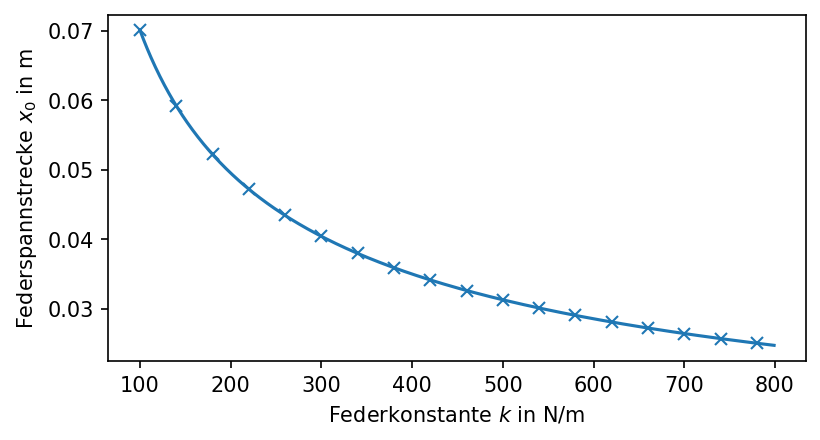

In [8]:
def f(k):
    return ((5*0.02*9.81*0.5)/(k))**0.5

# Definieren der Größe und des Aussehens des Plots
plt.figure(num=None, figsize=(6, 3), dpi=150, facecolor='w', edgecolor='k')

# Auftragen der Werte in den Plot
plt.plot(np.arange(100, 800, 1).reshape(-1,1),f(np.arange(100, 800, 1).reshape(-1,1)),"-")
plt.plot(tabelle['k in N/m'], tabelle['x0 in m'], 'x', c='#1f77b4')
plt.margins(0.05,0.05)
#plt.plot(tabelle['k'], tabelle['x0'], 'b-')
# Achsenbeschriftungen hinzufügen
plt.xlabel(r"Federkonstante $\mathit{k}$ in N/m")
plt.ylabel(r"Federspannstrecke $\mathit{x_0}$ in m")
plt.show()